# python DB connect

mysql 데이터 베이스에 테이블을 만들고 python 코드를 이용해서 데이터를 써보겠습니다. 
이를 통해서 코드를 이용해서 데이터를 다루는 법을 익혀보겠습니다.

In [3]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable


## DB 테이블 만들기

먼저 mysql workbench를 열어주고, 타이타닉 데이터 셋을 저장하기 위한 테이블을 만들어주겠습니다. Name 필드의 데이터 타입에 신경써주세요.

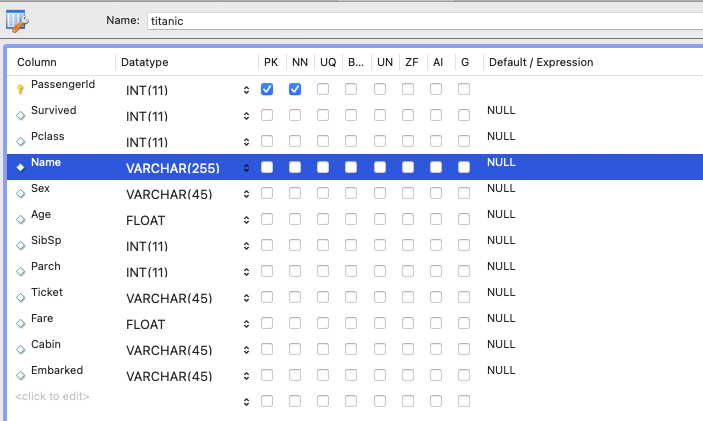

## python 코드로 mysql 접속하기

python 코드에서 mysql을 접속하기 위해서는 pymysql 라이브러리를 이용해야합니다.  
설치한 뒤에 사용해보겠습니다.

In [54]:
!pip install pymysql

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import pymysql

## Read Query

먼저 타이타닉 테이블에 모든 데이터를 읽어보겠습니다.  
SQL 쿼리를 날리고 싶을 때는 with문을 사용해서 connection의 cursor를 만들어서 사용합니다.

In [67]:
conn = pymysql.connect(
    host = "127.0.0.1",
    user = "root",
    password = "0000",
    database= "multicampus"
)

In [68]:
select_sql = "SELECT * FROM titanic"
with conn.cursor() as cursor:
    cursor.execute(select_sql)
    result = cursor.fetchall()   # fetchall  : 데이터 다 읽어와라
    

In [69]:
result

((1,
  0,
  3,
  'Braund, Mr. Owen Harris',
  'male',
  22.0,
  1,
  0,
  'A/5 21171',
  7.25,
  None,
  'S'),
 (2,
  1,
  1,
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'female',
  38.0,
  1,
  0,
  'PC 17599',
  71.2833,
  'C85',
  'C'),
 (3,
  1,
  3,
  'Heikkinen, Miss. Laina',
  'female',
  26.0,
  0,
  0,
  'STON/O2. 3101282',
  7.925,
  None,
  'S'),
 (4,
  1,
  1,
  'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'female',
  35.0,
  1,
  0,
  '113803',
  53.1,
  'C123',
  'S'),
 (5,
  0,
  3,
  'Allen, Mr. William Henry',
  'male',
  35.0,
  0,
  0,
  '373450',
  8.05,
  None,
  'S'),
 (6,
  0,
  3,
  'Moran, Mr. James',
  'male',
  None,
  0,
  0,
  '330877',
  8.4583,
  None,
  'Q'),
 (7,
  0,
  1,
  'McCarthy, Mr. Timothy J',
  'male',
  54.0,
  0,
  0,
  '17463',
  51.8625,
  'E46',
  'S'),
 (8,
  0,
  3,
  'Palsson, Master. Gosta Leonard',
  'male',
  2.0,
  3,
  1,
  '349909',
  21.075,
  None,
  'S'),
 (9,
  1,
  3,
  'Johnson, Mrs. Oscar W (Elisabeth Vi

In [70]:
print("total records", len(result))
for row in result:
    print(row)

total records 891
(1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171', 7.25, None, 'S')
(2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
(3, 1, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0, 'STON/O2. 3101282', 7.925, None, 'S')
(4, 1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', 53.1, 'C123', 'S')
(5, 0, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0, '373450', 8.05, None, 'S')
(6, 0, 3, 'Moran, Mr. James', 'male', None, 0, 0, '330877', 8.4583, None, 'Q')
(7, 0, 1, 'McCarthy, Mr. Timothy J', 'male', 54.0, 0, 0, '17463', 51.8625, 'E46', 'S')
(8, 0, 3, 'Palsson, Master. Gosta Leonard', 'male', 2.0, 3, 1, '349909', 21.075, None, 'S')
(9, 1, 3, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27.0, 0, 2, '347742', 11.1333, None, 'S')
(10, 1, 2, 'Nasser, Mrs. Nicholas (Adele Achem)', 'female', 14.0, 1, 0, '237736', 30.0708, None, 'C')
(11, 1, 3,

## Write Query

현재는 타이타닉 테이블이 텅 비어있습니다.  
이번에는 csv 파일을 읽어와서 한줄 한줄 타이타닉 테이블에 써보겠습니다.

In [71]:
write_sql = "INSERT IGNORE INTO titanic VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"   # %S 컬럼 개수만큼
# IGNORE 중복되는 데이터 삽입 안 하고 스킵 (key값 중복 에러)

In [72]:
import csv

with open("./data/titanic_train.csv") as fr:
    reader = csv.reader(fr)
    for i, row in enumerate(reader):      # 인덱스 값도 같이 읽어오는
        if i == 0:
            continue
        if i > 10:
            break
        # 비어있는 문자열 값을 None으로 대체해주는 코드
        row = [x if x else None for x in row]
        with conn.cursor() as cursor:
            result = cursor.execute(write_sql, row)     # db에 변화를 주는 코드 진행 후에 conn.commit()하기
            conn.commit()
            
        print("write:", result)
        

write: 0
write: 0
write: 0
write: 0
write: 0
write: 0
write: 0
write: 0
write: 0
write: 0


## Delete Query

기존 타이타닉 테이블 데이터를 지우는 쿼리도 날려보겠습니다.

In [73]:
delete_sql = "DELETE FROM titanic"

with conn.cursor() as cursor:
    result = cursor.execute(delete_sql)   # 쿼리 날리고
    conn.commit()                         # 변화를 주고 나서 commit을 해야지 변경한 게 반영됨

print("DELETE:", result)


DELETE: 891


## Bulk Write Query(심화)

디비에 데이터를 한줄 한줄 쓰는 작업은 굉장히 비효율적입니다.  
여러 줄을 한꺼번에 입력하는게 훨씬 성능이 뛰어납니다.  
한번 pymysql의 execute_many 기능을 이용해서 여러 데이터를 한꺼번에 입력해보겠습니다.

In [80]:
# 여러개의 줄을 묶어서 db에 쓰기
# 최적화 작업

def bulk_write(data_file_path, batchsize):
    with open(data_file_path) as fr:
        reader = csv.reader(fr)
        buffer = []
        for i, row in enumerate(reader):
            if i == 0:                                 # 첫 번재 행은 컬럼 이름 부분이라서 패쓰
                continue
            row = [x if x else None for x in row]    # 전처리한 row
            buffer.append(row)
            if len(buffer) == batchsize:     # batchsize만큼 모이면 db에 써주겟다
                with conn.cursor() as cursor:
                    result = cursor.executemany(write_sql, buffer)  # executemany함수 이용해 전처리한 row buffer 전달하기
                    conn.commit()                                   # 변경사항 반영하고
                    print("write:", result)
                buffer = []   # 그리고 buffer 다시 비워주기
        if buffer:               # for문 빠져나오기   # buffer에 남아있는 데이터들도 write 해주기
            with conn.cursor() as cursor:
                    result = cursor.executemany(write_sql, buffer)  
                    conn.commit()                                   
                    print("write:", result)
            
            
    

In [81]:
bulk_write("./data/titanic_train.csv", 100)

write: 0
write: 0
write: 0
write: 0
write: 0
write: 0
write: 0
write: 0
write: 0


## 타이타닉 생존자 데이터 읽기

데이터 베이스에 데이터를 채워넣었으니, 이제 SQL 쿼리를 작성해서 원하는 형태로 데이터를 읽어보겠습니다.  
한번 생존자 중에 3등칸에 탔으며, 나이가 10살 이하인 승객들의 이름만 읽어보겠습니다.

In [51]:
select_sql = '''
SELECT
    NAME,
    Survived,
    Pclass,
    Age
FROM
    titanic
WHERE
    Survived=1
    AND Pclass = 3
    AND Age <= 10

'''

In [52]:
def read_data(sql):
    with conn.cursor() as cursor:
        cursor.execute(sql)
        result = cursor.fetchall()
    return result

In [53]:
read_data(select_sql)

(('Sandstrom, Miss. Marguerite Rut', 1, 3, 4.0),
 ('Goldsmith, Master. Frank John William "Frankie"', 1, 3, 9.0),
 ('Johnson, Miss. Eleanor Ileen', 1, 3, 1.0),
 ('Kink-Heilmann, Miss. Luise Gretchen', 1, 3, 4.0),
 ('Asplund, Miss. Lillian Gertrud', 1, 3, 5.0),
 ('Asplund, Master. Edvin Rojj Felix', 1, 3, 3.0),
 ('Coutts, Master. William Loch "William"', 1, 3, 3.0),
 ('Nakid, Miss. Maria ("Mary")', 1, 3, 1.0),
 ('Baclini, Miss. Marie Catherine', 1, 3, 5.0),
 ('Baclini, Miss. Helene Barbara', 1, 3, 0.75),
 ('Hirvonen, Miss. Hildur E', 1, 3, 2.0),
 ('Coutts, Master. Eden Leslie "Neville"', 1, 3, 9.0),
 ('Baclini, Miss. Eugenie', 1, 3, 0.75),
 ('Karun, Miss. Manca', 1, 3, 4.0),
 ('Moor, Master. Meier', 1, 3, 6.0),
 ('Emanuel, Miss. Virginia Ethel', 1, 3, 5.0),
 ('Dean, Master. Bertram Vere', 1, 3, 1.0),
 ('Thomas, Master. Assad Alexander', 1, 3, 0.42),
 ('Johnson, Master. Harold Theodor', 1, 3, 4.0))

### 연습문제

1. 운임을 50달러 이하로 지불한 승객들 가운데 승선지가 C 혹은 Q 인 사람들의 이름을 읽어오세요. (WHERE)
2. 부모, 자식이 한명이라도 탑승한 승객들 가운데 사망한 사람의 이름을 읽어오세요. (WHERE)
3. 생존자들 가운데 나이가 많은 상위 10명의 이름을 읽어오세요. (ORDER BY, LIMIT)
4. 생존자들 가운데 나이가 10번째로 많은 사람부터 20번째로 많은 사람까지 읽어오세요. (ORDER BY, LIMIT, OFFSET)
5. 1등석, 2등석, 3등석 승객들의 총 운임, 평균 운임을 각각 구하세요. (GROUP BY, SUM, AVG)
6. 좌석 등급, 성별로 그룹을 지어 평균 연령을 집계해보세요. (GROUP BY, AVG)
7. 승선지, 좌석 등급으로 그룹을 지어 몇명의 승객이 탔는지 집계해보세요. (GROUP BY, COUNT)

In [99]:
problem1 = """
SELECT 
    Name 
FROM 
    titanic 
WHERE 
    Fare <= 50 
    AND (Embarked = 'C' or Embarked = 'Q')
"""

In [100]:
data = read_data(problem1)
len(data), data[:10]

(182,
 (('Moran, Mr. James',),
  ('Nasser, Mrs. Nicholas (Adele Achem)',),
  ('Rice, Master. Eugene',),
  ('Masselmani, Mrs. Fatima',),
  ('McGowan, Miss. Anna "Annie"',),
  ('Emir, Mr. Farred Chehab',),
  ('O\'Dwyer, Miss. Ellen "Nellie"',),
  ('Uruchurtu, Don. Manuel E',),
  ('Glynn, Miss. Mary Agatha',),
  ('Mamee, Mr. Hanna',)))

In [101]:
problem2 = "SELECT Name FROM titanic WHERE Parch > 0 and Survived = 0"
data = read_data(problem2)
len(data), data[:10]

(104,
 (('Palsson, Master. Gosta Leonard',),
  ('Andersson, Mr. Anders Johan',),
  ('Rice, Master. Eugene',),
  ('Palsson, Miss. Torborg Danira',),
  ('Fortune, Mr. Charles Alexander',),
  ('Panula, Master. Juha Niilo',),
  ('Ostby, Mr. Engelhart Cornelius',),
  ('Goodwin, Master. William Frederick',),
  ('Skoog, Master. Harald',),
  ('Goodwin, Miss. Lillian Amy',)))

In [102]:
# 생존자들 가운데 나이가 많은 상위 10명의 이름을 읽어오세요. (ORDER BY, LIMIT)

problem3 = "SELECT Name, Age FROM titanic WHERE Survived = 0 ORDER BY Age DESC LIMIT 10"
data = read_data(problem3)
len(data), data[:10]

(10,
 (('Svensson, Mr. Johan', 74.0),
  ('Artagaveytia, Mr. Ramon', 71.0),
  ('Goldschmidt, Mr. George B', 71.0),
  ('Connors, Mr. Patrick', 70.5),
  ('Crosby, Capt. Edward Gifford', 70.0),
  ('Mitchell, Mr. Henry Michael', 70.0),
  ('Wheadon, Mr. Edward H', 66.0),
  ('Ostby, Mr. Engelhart Cornelius', 65.0),
  ('Millet, Mr. Francis Davis', 65.0),
  ('Duane, Mr. Frank', 65.0)))

In [104]:
# 생존자들 가운데 나이가 10번째로 많은 사람부터 20번째로 많은 사람까지 읽어오세요. (ORDER BY, LIMIT, OFFSET)

problem4 = "SELECT * FROM titanic WHERE Survived = 0 ORDER BY Age DESC LIMIT 10 OFFSET 10"
data = read_data(problem4)
len(data), data[:10]

(10,
 ((546,
   0,
   1,
   'Nicholson, Mr. Arthur Ernest',
   'male',
   64.0,
   0,
   0,
   '693',
   26.0,
   None,
   'S'),
  (439,
   0,
   1,
   'Fortune, Mr. Mark',
   'male',
   64.0,
   1,
   4,
   '19950',
   263.0,
   'C23 C25 C27',
   'S'),
  (556,
   0,
   1,
   'Wright, Mr. George',
   'male',
   62.0,
   0,
   0,
   '113807',
   26.55,
   None,
   'S'),
  (253,
   0,
   1,
   'Stead, Mr. William Thomas',
   'male',
   62.0,
   0,
   0,
   '113514',
   26.55,
   'C87',
   'S'),
  (626,
   0,
   1,
   'Sutton, Mr. Frederick',
   'male',
   61.0,
   0,
   0,
   '36963',
   32.3208,
   'D50',
   'S'),
  (327,
   0,
   3,
   'Nysveen, Mr. Johan Hansen',
   'male',
   61.0,
   0,
   0,
   '345364',
   6.2375,
   None,
   'S'),
  (171,
   0,
   1,
   'Van der hoef, Mr. Wyckoff',
   'male',
   61.0,
   0,
   0,
   '111240',
   33.5,
   'B19',
   'S'),
  (685,
   0,
   2,
   'Brown, Mr. Thomas William Solomon',
   'male',
   60.0,
   1,
   1,
   '29750',
   39.0,
   None,
   'S'

In [106]:
# 1등석, 2등석, 3등석 승객들의 총 운임, 평균 운임을 각각 구하세요. (GROUP BY, SUM, AVG)
problem5 = "SELECT Pclass, ROUND(SUM(FARE),3), ROUND(AVG(FARE),3) FROM titanic GROUP BY Pclass ORDER BY Pclass"
data = read_data(problem5)
len(data), data[:10]

(3, ((1, 18177.413, 84.155), (2, 3801.842, 20.662), (3, 6714.695, 13.676)))

In [107]:
# 좌석 등급, 성별로 그룹을 지어 평균 연령을 집계해보세요. (GROUP BY, AVG)
problem6 = "SELECT Pclass, SEX, ROUND(AVG(Age),3) FROM titanic GROUP BY Pclass, SEX ORDER BY Pclass"
read_data(problem6)

((1, 'female', 34.612),
 (1, 'male', 41.281),
 (2, 'female', 28.723),
 (2, 'male', 30.741),
 (3, 'female', 21.75),
 (3, 'male', 26.508))

In [113]:
# 승선지, 좌석 등급으로 그룹을 지어 몇명의 승객이 탔는지 집계해보세요. (GROUP BY, COUNT)
problem7 = """
SELECT Embarked, Pclass, COUNT(Name) FROM titanic WHERE Embarked IS NOT NULL GROUP BY Embarked, Pclass 
"""
data = read_data(problem7)
data

(('S', 3, 353),
 ('C', 1, 85),
 ('S', 1, 127),
 ('Q', 3, 72),
 ('C', 2, 17),
 ('S', 2, 164),
 ('C', 3, 66),
 ('Q', 1, 2),
 ('Q', 2, 3))